<a href="https://colab.research.google.com/github/septiatriil/Tugas-11-Python/blob/main/SeptiaTIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [27]:
ls

 3scene@
'Colab Notebooks'/
 daunseptia.jpg
 Fotoiaa.JPG
 GMB/
'Kwitansi Pembayat Rapid Test - Septia Tri Indah Lestarii.pdf'
'LA_GELADI2020_7_1101184026_SEPTIA TRI INDAH LESTARI.pdf'
'LH_GELADI2020_1_1101184026_SEPTIA TRI INDAH LESTARI-converted.pdf'
'LH_GELADI2020_2_1101184026_Septia Tri Indah Lestari.pdf'
 LH_GELADI2020_3_1101184026_SeptiaTriIndahLestari-dikonversi.pdf
'LH_GELADI2020_4_1101184026_SEPTIA TRI INDAH LESTARI.pdf'
'LH_GELADI2020_5_1101184026_SEPTIA TRI INDAH LESTARI.pdf'
'LH_GELADI2020_6_1101184026_SEPTIA TRI INDAH LESTARI.pdf'
 model_scene/
 nnmodel_scene/
'RapidTest - Geladi 2020 - 1101184026 - Septia Tri Indah Lestari.pdf'
'Source code Tubes Python Kelompok D'/
 tugas11@
 tugas11python.jpeg


In [28]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [29]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("GMB")
data = []
labels = []

[INFO] loading images...


In [30]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [31]:
print(labels)

['GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05',

In [32]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [33]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [34]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [35]:
from keras.layers import Convolution2D, MaxPooling2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               313700    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [36]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [37]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 1s 74ms/step - loss: 1.5980 - accuracy: 0.2511 - val_loss: 1.5307 - val_accuracy: 0.3630
Epoch 2/25
14/14 [==============================] - 1s 64ms/step - loss: 1.4197 - accuracy: 0.4817 - val_loss: 1.3514 - val_accuracy: 0.3904
Epoch 3/25
14/14 [==============================] - 1s 64ms/step - loss: 1.2417 - accuracy: 0.4680 - val_loss: 1.1941 - val_accuracy: 0.5000
Epoch 4/25
14/14 [==============================] - 1s 65ms/step - loss: 1.0697 - accuracy: 0.5913 - val_loss: 1.0878 - val_accuracy: 0.5411
Epoch 5/25
14/14 [==============================] - 1s 64ms/step - loss: 0.9065 - accuracy: 0.6507 - val_loss: 0.9860 - val_accuracy: 0.6575
Epoch 6/25
14/14 [==============================] - 1s 67ms/step - loss: 0.8353 - accuracy: 0.6667 - val_loss: 0.9925 - val_accuracy: 0.6096
Epoch 7/25
14/14 [==============================] - 1s 65ms/step - loss: 0.7667 - accuracy: 0.7032 - val_loss: 0.9799 - val_accuracy: 0.6027
Epoch 8/25
14

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


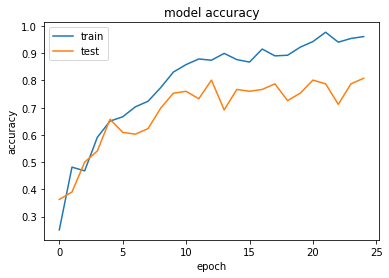

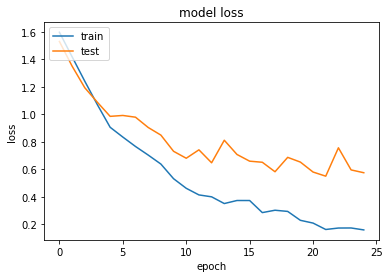

In [38]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.81      0.91      0.85        32
      GMB_02       0.83      0.77      0.80        26
      GMB_03       0.88      0.91      0.89        23
      GMB_04       0.76      0.80      0.78        35
      GMB_05       0.80      0.67      0.73        30

    accuracy                           0.81       146
   macro avg       0.81      0.81      0.81       146
weighted avg       0.81      0.81      0.81       146



In [40]:
model1.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [41]:
import cv2
import matplotlib.pyplot as plt
image1='daunseptia.jpg'

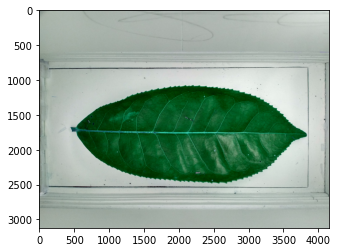

In [42]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [43]:
image_testing = Image.open('daunseptia.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [44]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [45]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[8.0707081e-02 1.4357140e-03 7.5427321e-05 1.9425096e-01 7.2353077e-01]]
['GMB_05']
